In [1]:
# required Python imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
from scipy.stats import norm, iqr

In [2]:
# Set Nature-like plots
import matplotlib as mpl
# Figure size
mpl.rcParams['figure.figsize'] = 6.2, 5.0
# Set x axis
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams['xtick.minor.size'] = 3
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['xtick.top'] = True
# Set y axis
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['ytick.minor.size'] = 3
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['ytick.right'] = True
# Font sizes
mpl.rcParams['axes.labelsize'] = 19
mpl.rcParams['xtick.labelsize'] = 17
mpl.rcParams['ytick.labelsize'] = 17
mpl.rcParams['legend.fontsize'] = 17
mpl.rcParams['font.size'] = 17
# Font Family
#mpl.rcParams['font.family'] = 'Open Sans'
# Set line widths
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['grid.linewidth'] = 1
mpl.rcParams['lines.linewidth'] = 2.0
mpl.rcParams['lines.markersize'] = 12
# Remove legend frame
mpl.rcParams['legend.frameon'] = False

In [3]:
dataset = pd.read_csv('output/2024-04-13_step7_lamb1987_noise_datapoints.csv')
dataset

,Euler1,Euler2,Euler3,n14,n14_noise,n16,n16_noise,n20,n20_noise,n24,n24_noise
0,0,0,0,0.000,3.914,0.000,7.982,0.000,6.545,0.284,3.623
1,0,0,7,0.000,14.189,0.000,6.546,0.000,2.591,0.270,14.267
2,0,0,14,0.000,16.350,0.044,0.672,0.000,13.638,0.229,6.981
3,0,0,21,0.000,1.026,0.000,9.955,0.000,0.855,0.000,9.528
4,0,0,28,0.000,6.833,0.352,11.441,0.000,12.312,0.234,5.038
...,...,...,...,...,...,...,...,...,...,...,...
4389,84,84,147,0.009,5.198,0.015,8.111,0.011,4.389,0.008,7.609
4390,84,84,154,0.008,4.872,0.013,6.922,0.008,6.923,0.008,9.032
4391,84,84,161,0.010,6.252,0.009,5.302,0.012,2.806,0.010,8.651
4392,84,84,168,0.010,4.294,0.011,6.530,0.009,7.324,0.010,7.166


In [4]:
dataset[['n14', 'n14_noise', 'n16', 'n16_noise', 'n20', 'n20_noise', 'n24', 'n24_noise']].describe()

,n14,n14_noise,n16,n16_noise,n20,n20_noise,n24,n24_noise
count,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000,4394.000000
mean,0.033167,5.560786,0.032281,5.298985,0.029446,4.841990,0.026013,4.528233
std,0.184988,3.742303,0.216980,3.581797,0.154842,3.380078,0.089004,3.279402
min,0.000000,0.004000,0.000000,0.009000,0.000000,0.009000,0.000000,0.059000
25%,0.003000,2.812000,0.002000,2.620250,0.002250,2.308000,0.002000,2.125000
50%,0.005000,4.640500,0.004000,4.368500,0.004000,3.959000,0.004000,3.608000
75%,0.011000,7.300750,0.010000,7.042750,0.010000,6.603500,0.009000,6.190750
max,6.963000,29.315000,9.456000,29.107000,4.566000,24.810000,2.156000,26.112000


## Visualize distributions

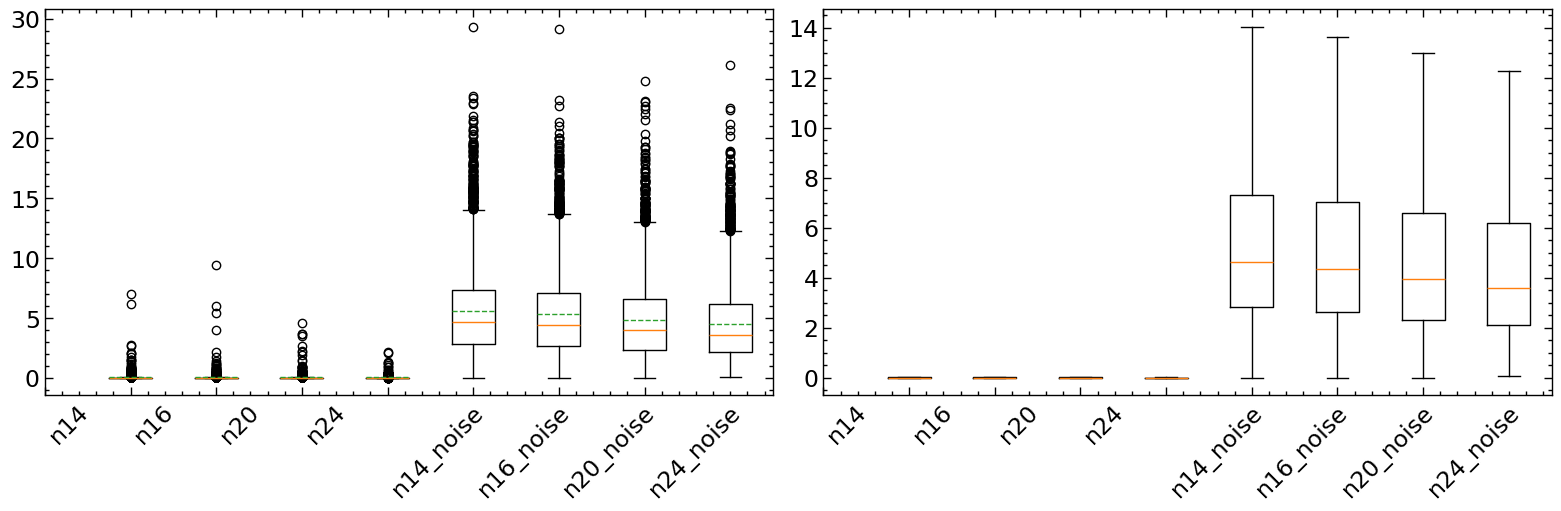

In [5]:
labels = ['n14', 'n16', 'n20', 'n24', 'n14_noise', 'n16_noise', 'n20_noise', 'n24_noise']

fig1, (ax1, ax2) = plt.subplots(ncols=2, figsize=(5*3.1,5), constrained_layout=True)

ax1.boxplot(dataset[labels], meanline=True, showmeans=True, labels=labels)
ax1.set_xticks(np.arange(8), labels, rotation=45, ha='left') 

ax2.boxplot(dataset[labels], showfliers=False, labels=labels)
_ = ax2.set_xticks(np.arange(8), labels, rotation=45, ha='left') 


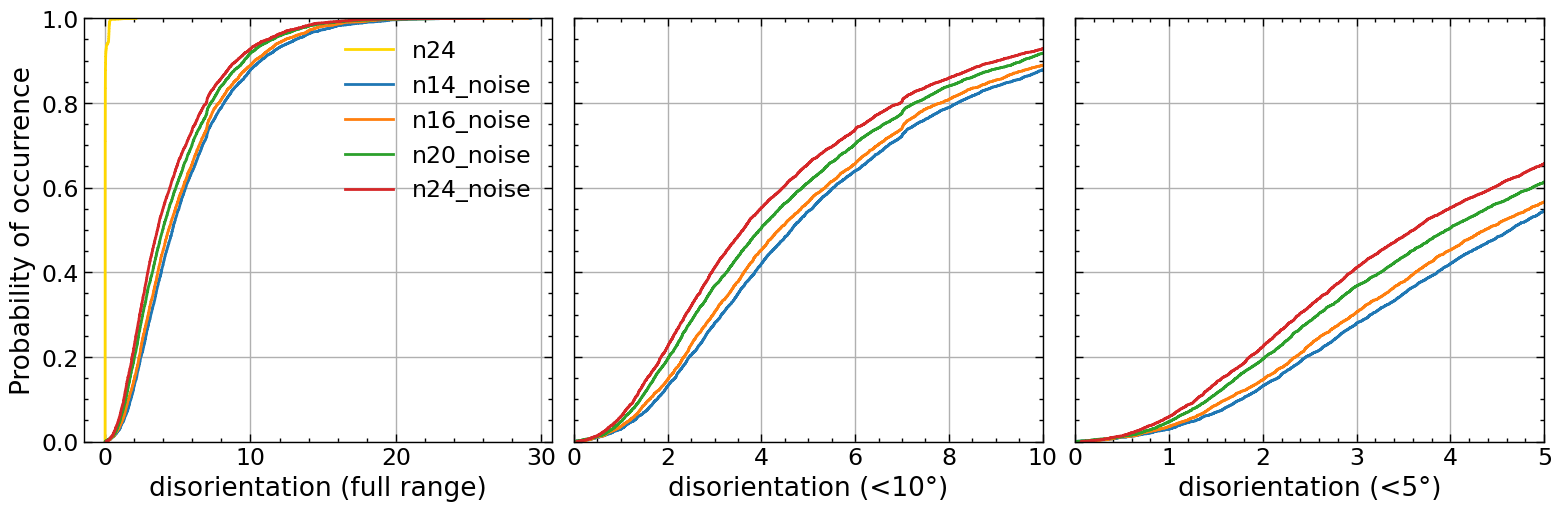

In [6]:
fig2, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(5*3.1, 5), sharey=True, constrained_layout=True)

ax1.ecdf(dataset['n24'], label='n24', color='gold')
ax1.ecdf(dataset['n14_noise'], label='n14_noise')
ax1.ecdf(dataset['n16_noise'], label='n16_noise')
ax1.ecdf(dataset['n20_noise'], label='n20_noise')
ax1.ecdf(dataset['n24_noise'], label='n24_noise')
ax1.grid(True)
ax1.set_xlabel('disorientation (full range)')
ax1.set_ylabel("Probability of occurrence")
ax1.legend(loc='best')

ax2.ecdf(dataset['n14_noise'], label='n14_noise')
ax2.ecdf(dataset['n16_noise'], label='n16_noise')
ax2.ecdf(dataset['n20_noise'], label='n20_noise')
ax2.ecdf(dataset['n24_noise'], label='n24_noise')
ax2.set_xlim(left=0, right=10)
ax2.grid(True)
ax2.set_xlabel('disorientation (<10°)')

ax3.ecdf(dataset['n14_noise'], label='n14_noise')
ax3.ecdf(dataset['n16_noise'], label='n16_noise')
ax3.ecdf(dataset['n20_noise'], label='n20_noise')
ax3.ecdf(dataset['n24_noise'], label='n24_noise')
ax3.set_xlim(left=0, right=5)
ax3.set_xlabel('disorientation (<5°)')
_ = ax3.grid(True)

In [7]:
def median_ci(pop, n, ci=0.95):
    """ Estimate the approximate ci 95% error margins for the median
    using a rule of thumb based on Hollander and Wolfe (1999).
    """

    z_score = norm.ppf(1 - (1 - ci) / 2)  # two-tailed z score

    id_upper = 1 + (n / 2) + (z_score * np.sqrt(n)) / 2
    id_lower = (n / 2) - (z_score * np.sqrt(n)) / 2

    if int(np.ceil(id_upper)) >= len(pop):
        upper_ci, lower_ci = pop[-1], pop[int(np.floor(id_lower))]
    else:
        upper_ci, lower_ci = pop[int(np.ceil(id_upper))], pop[int(np.floor(id_lower))]
    interval = upper_ci - lower_ci

    return (lower_ci, upper_ci), interval

def median(pop, ci=0.95):
    """ Returns the median, the interquartile length, and the confidence
    intervals for the median based on th rule-of-thumb method of Hollander
    and Wolfe (1999).
    """
    pop, n = np.sort(pop), len(pop)
    median, iqr_range = np.median(pop), iqr(pop)

    # compute confidence intervals
    ci_limits, length = median_ci(pop, n, ci)

    return median, iqr_range, ci_limits, length

In [8]:
mid14_samples, iqr14_samples, ci14_samples, length14_samples = median(dataset['n14_noise'])
mid16_samples, iqr16_samples, ci16_samples, length16_samples = median(dataset['n16_noise'])
mid20_samples, iqr20_samples, ci20_samples, length20_samples = median(dataset['n20_noise'])
mid24_samples, iqr24_samples, ci24_samples, length24_samples = median(dataset['n24_noise'])


print('EVALUATION OF ALGORITHMS USING DISORIENTATION IN DEGREES (ROBUST APPROACH)')
print('')
print('14 datapoints')
print(f'Median: {mid14_samples:.3f}; CI(min,max): {ci14_samples}')
print(f'   IQR: {iqr14_samples:.3f}; length: {length14_samples:.3f}')
print('')
print('16 datapoints')
print(f'Median: {mid16_samples:.3f}; CI(min,max): {ci16_samples}')
print(f'   IQR: {iqr16_samples:.3f}; length: {length16_samples:.3f}')
print('')
print('20 datapoints')
print(f'Median: {mid20_samples:.3f}; CI(min,max): {ci20_samples}')
print(f'   IQR: {iqr20_samples:.3f}; length: {length20_samples:.3f}')
print('')
print('24 datapoints')
print(f'Median: {mid24_samples:.3f}; CI(min,max): {ci24_samples}')
print(f'   IQR: {iqr24_samples:.3f}; length: {length24_samples:.3f}')
print('')

EVALUATION OF ALGORITHMS USING DISORIENTATION IN DEGREES (ROBUST APPROACH)

14 datapoints
Median: 4.641; CI(min,max): (4.519, 4.744)
   IQR: 4.489; length: 0.225

16 datapoints
Median: 4.369; CI(min,max): (4.247, 4.516)
   IQR: 4.422; length: 0.269

20 datapoints
Median: 3.959; CI(min,max): (3.846, 4.08)
   IQR: 4.296; length: 0.234

24 datapoints
Median: 3.608; CI(min,max): (3.502, 3.707)
   IQR: 4.066; length: 0.205



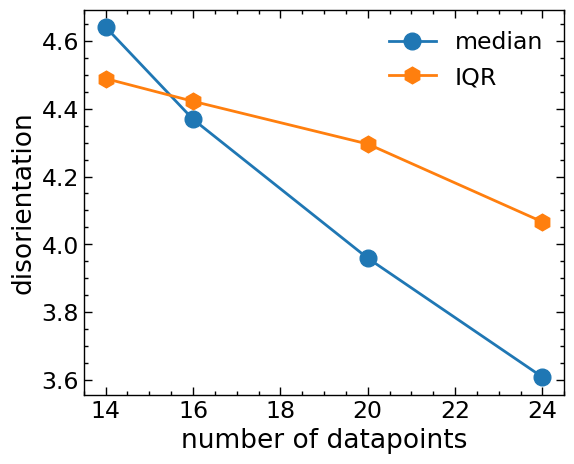

In [9]:
fig, ax = plt.subplots()

ax.plot([14, 16, 20, 24], [4.641, 4.369, 3.959, 3.608], 'o-', label='median')
ax.plot([14, 16, 20, 24], [4.489, 4.422, 4.296, 4.066], 'h-', label='IQR')
# ax.set_xticks([14, 16, 20, 24])  
ax.set_ylabel('disorientation')
ax.set_xlabel('number of datapoints')
ax.legend(loc='best')

## Percent of wrong estimates

In [10]:
print('% of wrong estimates:')
print('')
print('DATAPOINTS = 14')
print(f"Percent above 1 degree (no noise): {100 * (dataset['n14'] > 1).mean():.2f} %")
print(f"Percent above 1 degree (noise): {100 * (dataset['n14_noise'] > 1).mean():.2f} %")
print(f"Percent above 5 degree (noise): {100 * (dataset['n14_noise'] > 5).mean():.2f} %")
print(f"Percent above 10 degree (noise): {100 * (dataset['n14_noise'] > 10).mean():.2f} %")
print('')
print('DATAPOINTS = 16')
print(f"Percent above 1 degree (no noise): {100 * (dataset['n16'] > 1).mean():.2f} %")
print(f"Percent above 1 degree (noise): {100 * (dataset['n16_noise'] > 1).mean():.2f} %")
print(f"Percent above 5 degree (noise): {100 * (dataset['n16_noise'] > 5).mean():.2f} %")
print(f"Percent above 10 degree (noise): {100 * (dataset['n16_noise'] > 10).mean():.2f} %")
print('')
print('DATAPOINTS = 20')
print(f"Percent above 1 degree (no noise): {100 * (dataset['n20'] > 1).mean():.2f} %")
print(f"Percent above 1 degree (noise): {100 * (dataset['n20_noise'] > 1).mean():.2f} %")
print(f"Percent above 5 degree (noise): {100 * (dataset['n20_noise'] > 5).mean():.2f} %")
print(f"Percent above 10 degree (noise): {100 * (dataset['n20_noise'] > 10).mean():.2f} %")
print('')
print('DATAPOINTS = 24')
print(f"Percent above 1 degree (no noise): {100 * (dataset['n24'] > 1).mean():.2f} %")
print(f"Percent above 1 degree (noise): {100 * (dataset['n24_noise'] > 1).mean():.2f} %")
print(f"Percent above 5 degree (noise): {100 * (dataset['n24_noise'] > 5).mean():.2f} %")
print(f"Percent above 10 degree (noise): {100 * (dataset['n24_noise'] > 10).mean():.2f} %")


% of wrong estimates:

DATAPOINTS = 14
Percent above 1 degree (no noise): 0.32 %
Percent above 1 degree (noise): 97.04 %
Percent above 5 degree (noise): 45.56 %
Percent above 10 degree (noise): 12.20 %

DATAPOINTS = 16
Percent above 1 degree (no noise): 0.25 %
Percent above 1 degree (noise): 96.43 %
Percent above 5 degree (noise): 43.42 %
Percent above 10 degree (noise): 11.11 %

DATAPOINTS = 20
Percent above 1 degree (no noise): 0.25 %
Percent above 1 degree (noise): 95.27 %
Percent above 5 degree (noise): 38.73 %
Percent above 10 degree (noise): 8.24 %

DATAPOINTS = 24
Percent above 1 degree (no noise): 0.14 %
Percent above 1 degree (noise): 94.06 %
Percent above 5 degree (noise): 34.30 %
Percent above 10 degree (noise): 7.21 %


Text(0.5, 0, 'number of datapoints')

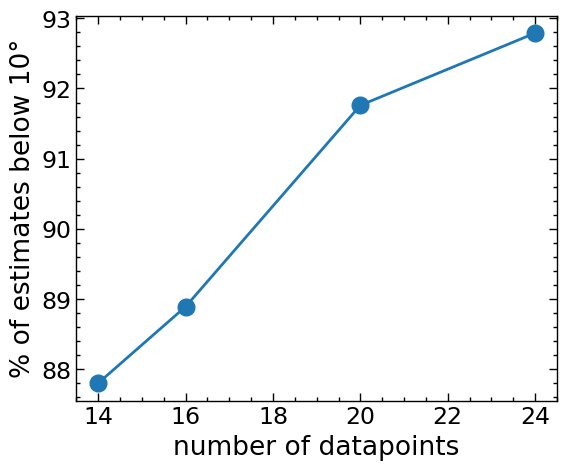

In [14]:
fig, ax = plt.subplots()

ax.plot([14, 16, 20, 24], [100-12.20, 100-11.11, 100-8.24, 100-7.21], 'o-')
ax.set_ylabel('% of estimates below 10°')
ax.set_xlabel('number of datapoints')

## Others

In [12]:
dataset[dataset['n24_noise'] > 10]

,Euler1,Euler2,Euler3,n14,n14_noise,n16,n16_noise,n20,n20_noise,n24,n24_noise
1,0,0,7,0.000,14.189,0.000,6.546,0.000,2.591,0.270,14.267
6,0,0,42,0.000,10.428,0.000,4.809,0.000,15.011,0.249,12.189
7,0,0,49,0.000,17.660,0.000,10.013,0.000,8.124,0.000,14.927
9,0,0,63,0.000,14.742,0.000,10.047,0.064,23.065,0.000,10.998
17,0,0,119,0.262,9.713,0.000,4.310,0.232,8.287,0.000,15.777
...,...,...,...,...,...,...,...,...,...,...,...
4179,84,28,133,0.008,3.131,0.044,9.587,0.007,1.405,0.056,10.479
4182,84,28,154,0.027,5.851,0.079,11.821,0.054,3.228,0.039,10.075
4205,84,35,133,0.013,4.909,0.055,14.422,0.045,5.282,0.029,14.516
4229,84,42,119,0.009,2.949,0.033,4.287,0.043,8.516,0.009,10.557
